#Bancada 3

**<center>Universidade Federal do Pará</center>**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:**

Edimar Fernandes Dias - 201933940004

D'nne D'Vitor    

Rodrigo de Souza Castro - 201833940020             


# <center> Modelagem de sistema por função de transferência pulsada </center>
---

### **Objetivo:**

- Encontrar a função de transferência pulsada de uma planta real.

<p align='justify'>Vale destacar para o passo 1, que a entrada aplicada na planta no contexto de Identificação de Sistemas geralmente é um sinal chamado Pseudo Random Binary Sequence (PRBS). Esse sinal tem o propósito de extrair da planta o máximo de informação sobre a dinâmica de transitórios. </p>

Com as informaçõe da planta, podemos presumir que a planta seja de $3^{\underline{\circ}}$ ordem, pois o motor DC, o gerador DC e o filtro são subsistemas de $1^{\underline{\circ}}$ ordem em cascata. Isso não significa que o modelo adotados necessariamente precisa ser de $3^{\underline{\circ}}$ ordem, apenas é uma dica importante para interpretarmos os resultados.</p>

#Passo 1

## Os dados dos ensaios estão compartilhados na pasta:

https://drive.google.com/file/d/1eyeSYrbdkd2G62yXkh6ez0414L2jVZJB/view?usp=sharing

In [ ]:
# caminho do arquivo .npy
npy_path = '/content/drive/MyDrive/driverclt/dados_PRBS.npy'

# Carrega os dados do arquivo .npy
dados_npy = np.load(npy_path)

# Separa o vetor de tempo do experimento
tempo_npy = dados_npy[:, 0]
entrada_npy = dados_npy[:, 1]
saida_npy = dados_npy[:, 2]


<p align='justify'>Uma boa prática em um primeiro contato com dados desconhecidos é visualizá-los em forma de gráficos, portanto, vamos plotar um gráfico com a entrada e saída da planta para se familiarizar com o sistema.</p>

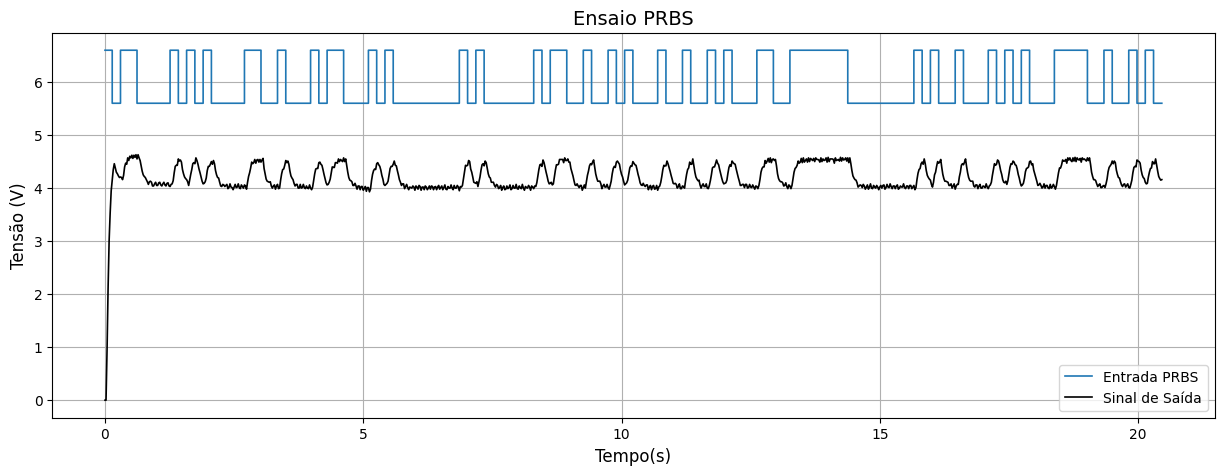

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(15, 5))

# Plota o gráfico de entrada
plt.plot(tempo_npy, entrada_npy, drawstyle="steps", linewidth=1.2, label='Entrada PRBS')

# Plota o gráfico de saída
plt.plot(tempo_npy, saida_npy, color='k', linewidth=1.2, label='Sinal de Saída')

# Configura o rótulo do eixo x
plt.xlabel('Tempo(s)', fontsize=12)

# Configura o rótulo do eixo y
plt.ylabel('Tensão (V)', fontsize=12)

# Configura o título
plt.title('Ensaio PRBS', fontsize=14)

# Configura a legenda
plt.legend(loc='lower right')

# Configura a grade do gráfico
plt.grid(True)

# Mostra o gráfico gerado
plt.show()


# Passo 2

**Os dados são dividimos em dois subconjuntos: o de treino e de teste conforme o código abaixo.**

In [ ]:
# Vetores de tempo
intervalo_train = np.arange(50, 500)
intervalo_test = np.arange(500, 950)

t_train, t_test = tempo_npy[intervalo_train], tempo_npy[intervalo_test]

# Vetores da entrada
xtrain, xtest = entrada_npy[intervalo_train], entrada_npy[intervalo_test]

# Vetores da saída
ytrain, ytest = saida_npy[intervalo_train], saida_npy[intervalo_test]



# Passo 3

Nesse passo deve-se determinar a ordem da função de transferência pulsada. Uma seleção arbitrária seria a primeira ordem, substituindo o valor de $N = 1$ na Eq. 1 obtem-se:
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$


$$ H(z) = \frac{b_0+b_1z^{-1}}
{1+a_1z^{-1}} \tag{2}$$

Observe que $M=1$ é adotado.

Novamente, desatca-se que considera-se $b_0 = 0$, isso fará com que a função de transferência não tenha zeros finitos. Logo, temos:

$$ H(z) = \frac{b_1z^{-1}}
{1+a_1z^{-1}} \tag{3}$$

expressando na forma de equação de diferenças:

$$ y[n] = -a_1y[n-1] + b_1x[n-1] \tag{4}$$

Dessa forma, já podemos desenvolver o código para calcular os coeficientes.

# Passo 4

A matriz de regressores pode ser montada através do código abaixo.

In [ ]:
# Variável tempo discreto (amostras)
k = np.arange(1, len(xtrain))

# Matriz de Regressores (Primeira Ordem)
PSI = np.array([-ytrain[k-1], xtrain[k-1]]).T


# Passo 5

Podemos expressar a Equação 5 em forma de código e calcular o vetor de coeficientes conforme segue.

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{5}$$

In [ ]:
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo 6

Sistema de Primeira Ordem



$$ H(z) = \frac{b_1z^{-1}}
{1+a_1z^{-1}} \tag{6}$$

Substituindo os coeficientes na Eq. 6 obtemos a funções de transferência pulsado do sistema conforme o código abaixo.

**Obtivemos:**

Período de Amostragem: 0.01999999999999966

**Função de transferência discreta.**
 $$G(z)=\frac{0.1008}{z - 0.8575}$$



dt = 0.01999999999999966.


In [ ]:
# Separando os coeficientes
a1, b1 = teta
# a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1]
# B = [b1, b2]

# Denominador de H(z)
A = [1, a1]
# A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo_npy))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=", Gz)

Período de Amostragem: 0.01999999999999966

 G(z)= 
  0.1008
----------
z - 0.8575

dt = 0.01999999999999966



# Passo 7

<p align='justify'> Por ultimo, mas não menos importante, deve-se validar a função de transferência encontrada com os dados de teste. Para isso iremos utilizar a Eq. 7 para calcular o erro quadrático médio. A biblioteca scikit-learn já possui uma função para realizar esse cálculo conforme o código abaixo. Como observado o valor do erro foi relativamente baixo, o que nos mostra que o modelo está razoável.</p>


$$ EQM = \frac{1}{N_a - 1}\sum\limits_{i=0}^{N_a - 1}( y_i - \hat{y}_i)^2 \tag{7}$$

**Erro médio quadrático: 0.004976**

In [ ]:
# Importar a função mean_squared_error
from sklearn.metrics import mean_squared_error


In [ ]:
# Respostas da função de transferência para a entrada de validação.
y_hat = ct.forced_response(Gz, U=xtest)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(ytest[50:], y_hat[50:])
print('Erro médio quadrático: %.6f' % MSE)

Erro médio quadrático: 0.004588


Outra forma de visualizar se o modelo está satisfatório é comparando o gráfico dos valores preditos com os observados. Como é visto no gráfico abaixo, o modelo é satisfatório em alguns momentos, mas em outros fica distante o valor observado, uma forma de tentar melhorar o modelo seria aumentando a ordem a função de transfência.

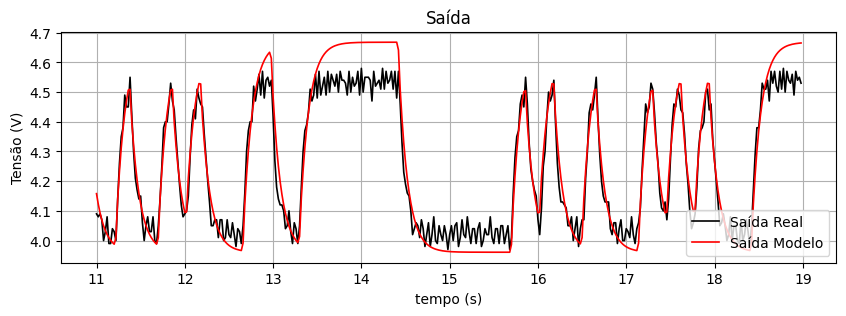

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(t_test[50:], ytest[50:], '-k', linewidth=1.2)
plt.plot(t_test[50:], y_hat[50:], '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

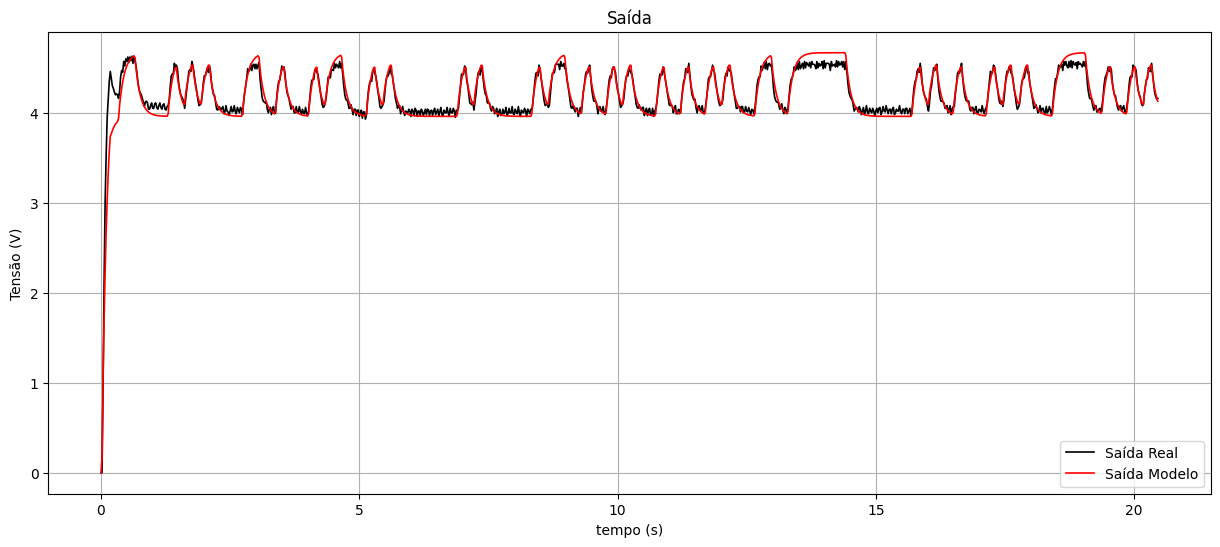

In [ ]:
# Célula que carrega os dados e define variáveis
# ...

# Cálculo da resposta para a entrada de treinamento
y_saida = ct.forced_response(Gz, U=entrada_npy)[1]

# Restante do código para plotar resultados
plt.figure(figsize=(15, 6))
plt.plot(tempo_npy, saida_npy, '-k', linewidth=1.2, label='Saída Real')
plt.plot(tempo_npy, y_saida, '-r', linewidth=1.2, label='Saída Modelo')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right')
plt.grid()
plt.show()


A expressão $G(z) = \frac{0.02628z + 0.1159}{z^2 - 0.7027z - 0.09628} $ é a função de transferência identificada a partir dos dados experimentais. Em resumo, essa é a função de transferência que modela a dinâmica do sistema sob força externa.

Período de Amostragem: 0.01999999999999966

 G(z)= 
   0.02628 z + 0.1159
------------------------
z^2 - 0.7027 z - 0.09628

dt = 0.01999999999999966

Erro médio quadrático: 0.004588


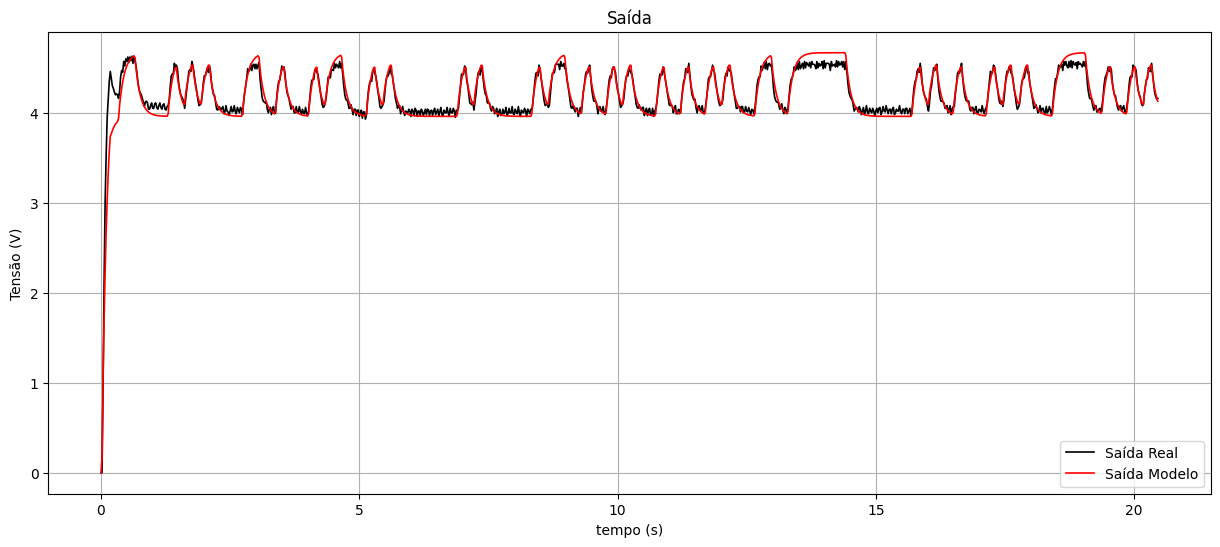

In [ ]:
# Matriz de Regressores (Segunda Ordem)
PSI = np.array([-ytrain[k-1], -ytrain[k-2], xtrain[k-1], xtrain[k-2]]).T

# Passo
# Calculo dos coeficientes
teta = np.linalg.inv(PSI.T@PSI)@PSI.T@ytrain[k]

# Passo
# Separando os coeficientes
a1, a2, b1, b2 = teta

# Numerador de H(z)
B = [b1, b2]

# Denominador de H(z)
A = [1, a1, a2]

# Período de amostragem em segundos
Ts = np.mean(np.diff(tempo_npy))
print('Período de Amostragem:', Ts)

# Função de transferência pulsada
Gz = ct.tf(B, A, Ts)
print("\n","G(z)=", Gz)

# Passo
# Respostas da função de transferência para a entrada de validação.
y_hat = ct.forced_response(Gz, U=xtest)[1]

# Calculo do EQM comparando os dados observados com preditos.
MSE = mean_squared_error(ytest[50:], y_hat[50:])
print('Erro médio quadrático: %.6f' % MSE)

y_saida = ct.forced_response(Gz, U=entrada_npy)[1]

plt.figure(figsize=(15,6))
plt.plot(tempo_npy, saida_npy, '-k', linewidth=1.2)
plt.plot(tempo_npy, y_saida, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()


**Esse gráfico mostra como a saída do sistema responde a uma entrada degrau ao longo do tempo, permitindo visualizar o comportamento transitório do sistema.**

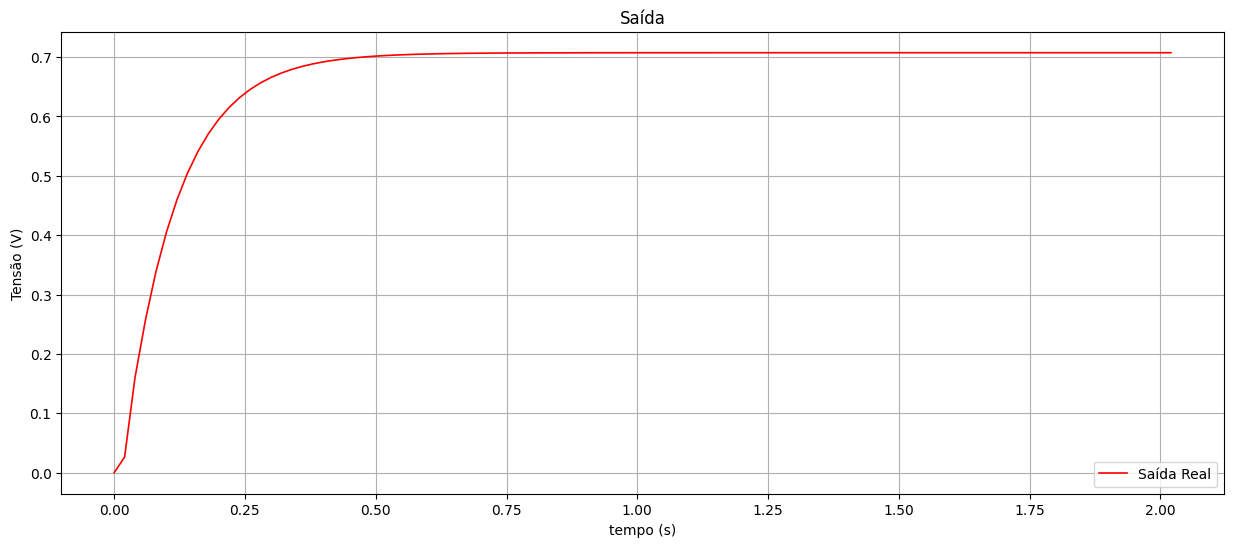

TransferFunction(array([0.02627549, 0.11593583]), array([ 1.        , -0.70265257, -0.09627659]), 0.01999999999999966)

In [ ]:
t,y_step = ct.step_response(Gz, T = 2)

plt.figure(figsize=(15,6))
plt.plot(t, y_step, '-r', linewidth=1.2)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Saída')
plt.legend(loc='lower right', labels=('Saída Real', 'Saída Modelo'))
plt.grid()
plt.subplots_adjust(hspace=0.5)
plt.show()
Gz

/usr/local/lib/python3.10/dist-packages/control/lti.py:173: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


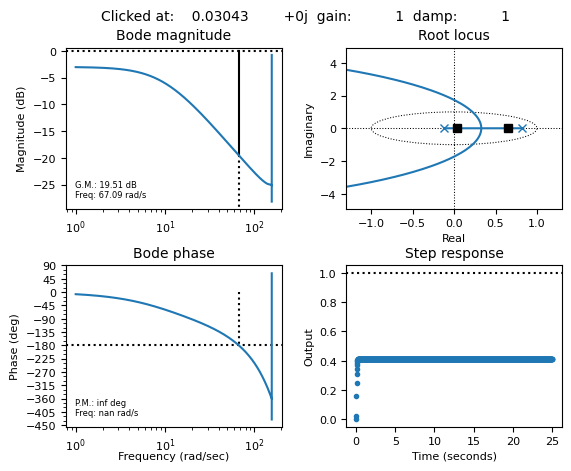

In [ ]:
plt.figure(figsize=(10,6))
ct.sisotool(Gz);
plt.show()